In [ ]:
import numpy as np
np.random.seed(42) # to make this code example reproducible 
m = 100 # number of instances 
# random.rand returns random floats in the half-open interval [0.0, 1.0)
X = 2 * np.random.rand(m, 1) # column vector 
y = 4 + 3 * X + np.random.randn(m, 1) # column vector

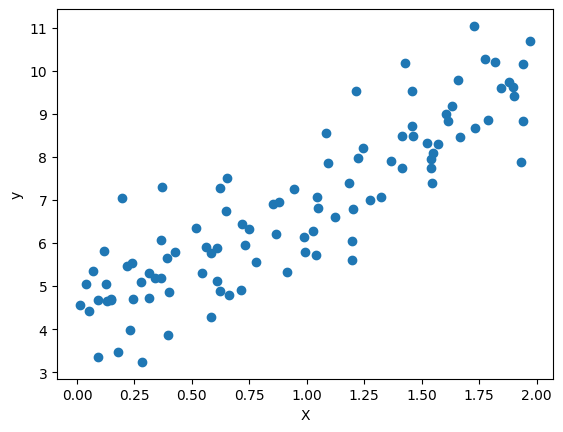

In [2]:
import matplotlib.pyplot as plt

plt.scatter(X, y)
plt.ylabel("y")
plt.xlabel("X")
plt.show()

In [ ]:
from sklearn.preprocessing import add_dummy_feature

X_b = add_dummy_feature(X) # adds a dummy_feature where x0=1
theta_best = np.linalg.inv(X_b.T@(X_b))@X_b.T@y
theta_best

array([[4.21509616],
       [2.77011339]])

In [4]:
X_new = np.array([[0], [2]])
X_new_b = add_dummy_feature(X_new)
y_predict = X_new_b @ theta_best
y_predict

array([[4.21509616],
       [9.75532293]])

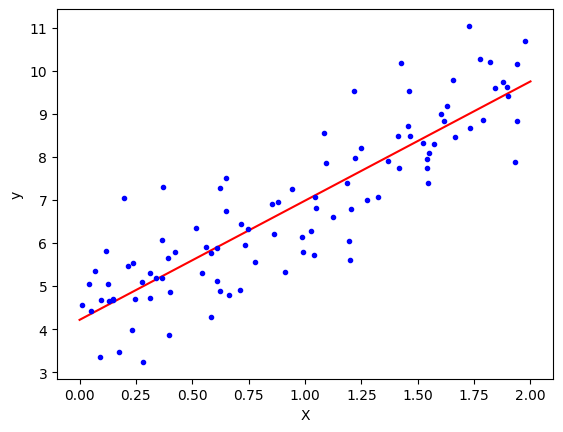

In [5]:
import matplotlib.pyplot as plt
plt.plot(X_new, y_predict, "r-", label="Predictions") 
plt.plot(X, y, "b.")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [6]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
# intercept is the bias term, and coef_ is the slope term
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [7]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

In [ ]:
# residuals is the difference between the actual and predicted values
# rank is the number of non-zero singular features which are also independent
# s is the singular values of X
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
print(theta_best_svd, residuals, rank, s)

[[4.21509616]
 [2.77011339]] [80.6584564] 2 [14.37020392  4.11961067]


In [9]:
# pinv is the pseudoinverse of X
# pseudoinverse is capable of handling both square and rectangular matrices
# It is useful when the matrix is singular or nearly singular
np.linalg.pinv(X_b) @ y

array([[4.21509616],
       [2.77011339]])

In [10]:
eta = 0.1
n_epochs = 1000
m = len(X_b)

np.random.seed(42)
# (2, 1) is the shape of theta
theta = np.random.randn(2, 1)

for epoch in range(n_epochs):
    gradient = 2/m * X_b.T@(X_b@theta-y)
    theta = theta - eta * gradient

In [11]:
theta

array([[4.21509616],
       [2.77011339]])

In [12]:
n_epochs = 50
t0, t1 = 5, 50

def learning_schedule(t):
    return t0 / (t + t1)

np.random.seed(42)
theta = np.random.randn(2, 1)

for epoch in range(n_epochs):
    for iterations in range(m):
        # randint selects a random integer from the given range
        random_indes = np.random.randint(m)
        # random_indes : random_indes+1 gives a 2d array of shape (1, 2)
        # just random_indes would have given a 1d array of shape (2,) which is not compatible with @
        xi = X_b[random_indes:random_indes+1]
        yi = y[random_indes:random_indes+1]
        gradients = 2 * xi.T@(xi@theta - yi)
        # as epoch and iterations increase, the learning rate decreases
        eta = learning_schedule(epoch * m + iterations)
        theta = theta - eta * gradients

In [13]:
theta

array([[4.21076011],
       [2.74856079]])

In [14]:
from sklearn.linear_model import SGDRegressor

# penalty=None means no regularization
# eta0 is the learning rate
# n_iter_no_change=100 means if the loss doesn't change for 100 iterations, then stop
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-5, penalty=None, eta0=0.01,
                       n_iter_no_change=100, random_state=42)
# .ravel() returns a flattened version of the array
# so if shape is (2,3) it becomes (6,)
sgd_reg.fit(X, y.ravel())

,loss,'squared_error'
,penalty,None
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,1e-05
,shuffle,True
,verbose,0
,epsilon,0.1
,random_state,42


In [15]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.21278812]), array([2.77270267]))

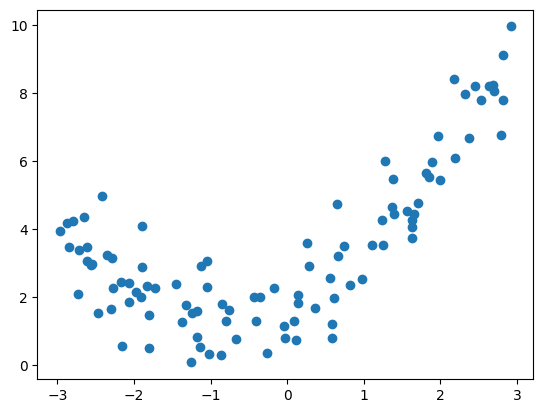

In [16]:
np.random.seed(42) 
m = 100 
X = 6 * np.random.rand(m, 1) - 3 
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)

plt.scatter(X, y)
plt.show()

In [17]:
from sklearn.preprocessing import PolynomialFeatures

ply_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = ply_features.fit_transform(X)
print(X[0], X_poly[0])

[-0.75275929] [-0.75275929  0.56664654]


(100, 1) (100, 1) (100, 2)


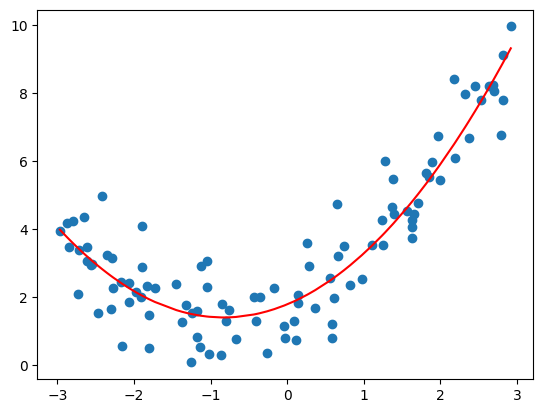

In [18]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg_predictions = lin_reg.predict(X_poly)
print(lin_reg_predictions.shape, X.shape, X_poly.shape)

# we use zip to combine X and predictions into pairs
# *sorted() sorts the pairs by the first element in ascending order
# zip(*sorted(zip(X.flatten(), lin_reg_predictions))) then reverses the pairs
X_sorted, y_pred_sorted = zip(*sorted(zip(X, lin_reg_predictions)))
plt.scatter(X, y)
plt.plot(X_sorted, y_pred_sorted, color='r')
plt.show()

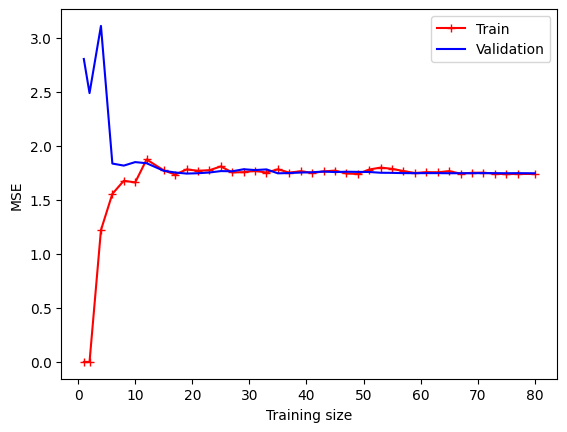

In [19]:
from sklearn.model_selection import learning_curve

# np.linspace(0.1, 1, 40) creates an array of 40 numbers from 0.1 to 1
# training_size is the number of instances used for training
training_size, train_scores, valid_scores = learning_curve(LinearRegression(), X, y, 
                                                        train_sizes = np.linspace(0.01, 1, 40), cv=5,
                                                        scoring="neg_root_mean_squared_error")
train_errors = -train_scores.mean(axis=1)
valid_errors =  -valid_scores.mean(axis=1)

plt.plot(training_size, train_errors, "r-+", label="Train")
plt.plot(training_size, valid_errors, "b-", label="Validation")
plt.xlabel("Training size")
plt.ylabel("MSE")
plt.legend()
plt.show()

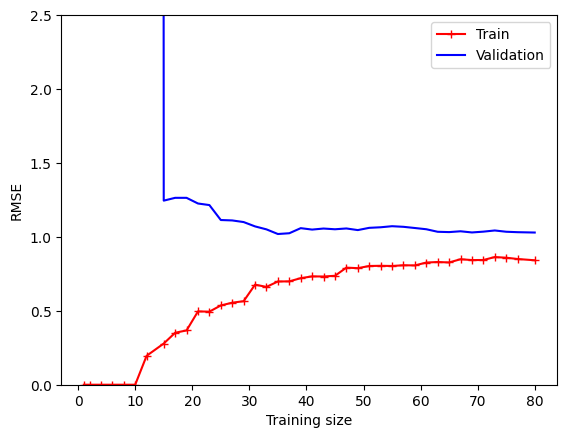

In [20]:
from sklearn.pipeline import make_pipeline

polynomial_regression = make_pipeline(PolynomialFeatures(degree=10, include_bias=False),
                                      LinearRegression())
train_sizes, train_scores, valid_scores = learning_curve( polynomial_regression, X, y, 
                                                         train_sizes=np.linspace(0.01, 1.0, 40), cv=5, 
                                                         scoring="neg_root_mean_squared_error")

train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.plot(train_sizes, train_errors, "r-+", label="Train")
plt.plot(train_sizes, valid_errors, "b-", label="Validation")
plt.ylim(0, 2.5)
plt.xlabel("Training size")
plt.ylabel("RMSE")
plt.legend()
plt.show()

In [21]:
from sklearn.linear_model import Ridge 
ridge_reg = Ridge(alpha=0.1, solver="cholesky") 
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([4.82899748])

In [22]:
sgd_reg = SGDRegressor(penalty="l2", alpha=0.1 / m, tol=None,
                       max_iter=1000, eta0=0.01, random_state=42)
sgd_reg.fit(X, y.ravel()) # y.ravel() cause .fit() expects 1D array
sgd_reg.predict([[1.5]])

array([4.82830117])

In [23]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])
# You could have instead used SGDRegressor with penalty "l1" and alpha=0.1

array([4.77621741])

In [24]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([4.78114505])

In [25]:
from copy import deepcopy
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)

preprocessing = make_pipeline(
    PolynomialFeatures(degree=90, include_bias=False),
    StandardScaler()
)

X_train_prep = preprocessing.fit_transform(X_train)
X_valid_prep = preprocessing.transform(X_valid)

sgd_reg = SGDRegressor(penalty=None, eta0=0.002, random_state=42)
n_epochs = 500
best_valid_rmse = float('inf')

for epoch in range(n_epochs):
    sgd_reg.partial_fit(X_train_prep, y_train.ravel())
    y_valid_predict = sgd_reg.predict(X_valid_prep)
    val_error = np.sqrt(mean_squared_error(y_valid_predict, y_valid.ravel()))
    
    if val_error < best_valid_rmse:
        best_valid_rmse = val_error
        best_model = deepcopy(sgd_reg)

In [26]:
from sklearn.datasets import load_iris

# as_frame=True loads the dataset as a pandas DataFrame instead of a numpy array
iris = load_iris(as_frame=True)

In [27]:
list(iris)

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [28]:
iris.data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [29]:
iris.target.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [30]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [31]:
from sklearn.linear_model import LogisticRegression

X = iris.data["petal width (cm)"].values
y = iris.target_names[iris.target] == 'virginica'

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

log_reg = LogisticRegression(random_state=42)
# in sklearn X_train is expected to be a 2D array
log_reg.fit(X_train.reshape(-1, 1), y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


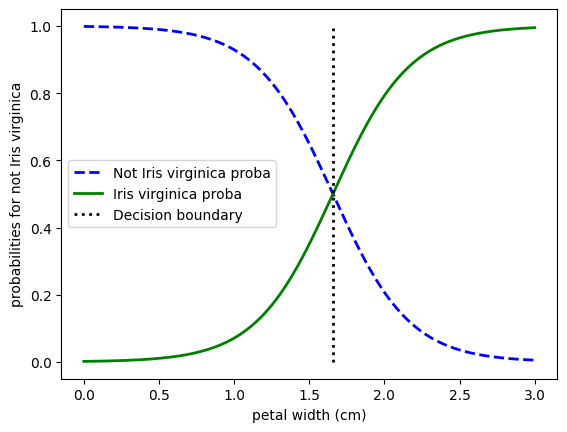

In [32]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

# [0, 0] means the probability of class 0, [1, 1] means the probability of class 1
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0, 0]

plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica proba")
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica proba") 
plt.plot([decision_boundary, decision_boundary], [0, 1], "k:", linewidth=2, label="Decision boundary")
plt.ylabel("probabilities for not Iris virginica")
plt.xlabel("petal width (cm)")
plt.legend()
plt.show()

In [33]:
decision_boundary

np.float64(1.6576576576576576)

In [34]:
log_reg.predict([[1.7], [1.5]])

array([ True, False])

In [35]:
X = iris.data[["petal length (cm)", "petal width (cm)"]].values 
y = iris["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

softmax_reg = LogisticRegression(C=30, random_state=42)
softmax_reg.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,30
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [36]:
softmax_reg.predict([[5, 2]])

array([2])

In [38]:
softmax_reg.predict_proba([[5, 2]]).round(2)

array([[0.  , 0.04, 0.96]])